# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Felix Anthony
- **Email:** m004b4ky1474@bangkit.academy
- **ID Dicoding:** felix03

## Menentukan Pertanyaan Bisnis

- Pada jam berapa pengguna rental bikes mencapai puncak aktivitasnya?
- Apakah cuaca memepengaruhi jumlah pengguna rental bikes pada suatu hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
#load day.csv and hour.csv file using pandas
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

In [3]:
#show the day data
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#show the hour data
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- data successfully loaded

### Assessing Data

In [5]:
# statistic description of day data
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# statistic description of hour data
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# day data info
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# hour data info
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- No missing values in both hour and day data

### Cleaning Data

In [9]:
#convert to datetime object
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- convert to datetime object so it could be use later


## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
# correlation between features
df_day.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [11]:
# cnt by grouping workingday
df_day.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

In [12]:
# cnt by grouping holiday
df_day.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
holiday                                              
0           710  8714    22  4527.104225  1929.013947
1            21  7403  1000  3735.000000  2103.350660

In [13]:
# cnt based on months
df_day.groupby(by="mnth").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
       max   min         mean          std
mnth                                      
1     4521   431  2176.338710  1161.674370
2     5062  1005  2655.298246  1145.313307
3     8362   605  3692.258065  1899.301812
4     7460   795  4484.900000  1776.160778
5     8294  2633  5349.774194  1298.711561
6     8120  3767  5772.366667  1240.400031
7     8173  3285  5563.677419  1273.751871
8     7865  1115  5664.419355  1494.516146
9     8714  1842  5766.516667  1810.130649
10    8156    22  5199.225806  1988.392517
11    6852  1495  4247.183333  1285.712709
12    6606   441  3403.806452  1549.639353

In [14]:
# range of the day data
df_day.max()-df_day.min()

,0
instant,730
dteday,730 days 00:00:00
season,3
yr,1
mnth,11
holiday,1
weekday,6
workingday,1
weathersit,2
temp,0.802537


In [15]:
# range of the hour data
df_hour.max()-df_hour.min()

,0
instant,17378
dteday,730 days 00:00:00
season,3
yr,1
mnth,11
hr,23
holiday,1
weekday,6
workingday,1
weathersit,3


**Insight:**
- Temperature has high correlation toward cnt
- humidity & windspeed have low correlation toward cnt.
- cnt values differs according to working day, holiday and months
- the features range variates

## Visualization & Explanatory Analysis

### Pertanyaan 1:

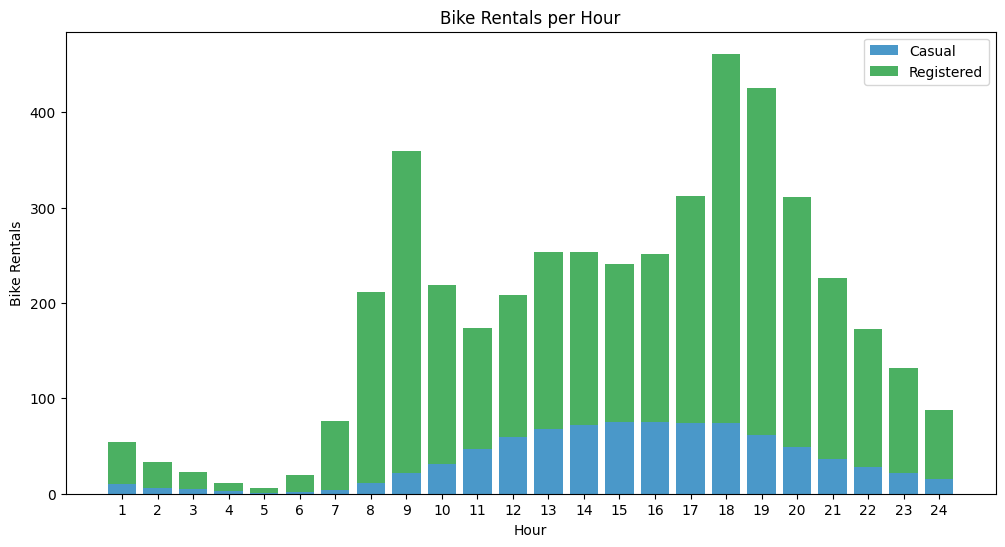

In [16]:
# rental bikes based on time of the day visualization
hours_registered = list(df_hour.groupby("hr")["registered"].mean())
hours_casual = list(df_hour.groupby("hr")["casual"].mean())
hours = list(df_hour.groupby("hr")["cnt"].mean())

plt.figure(figsize=(12, 6))
# intensity = (np.array(hours)+100) / (max(hours)+100)
intensity = (np.ones(len(hours))*0.6)
bar_colors_registered = cm.Greens(intensity)
bar_colors_casual = cm.Blues(intensity)
plt.bar(range(1,24+1), hours_casual, label='Casual', color=bar_colors_casual)
plt.bar(range(1,24+1), hours_registered, bottom=hours_casual, label='Registered', color=bar_colors_registered)
plt.xticks(range(1,len(hours_casual)+1))
plt.xlabel("Hour")
plt.ylabel("Bike Rentals")
plt.legend()
plt.title("Bike Rentals per Hour")
plt.show()


### Pertanyaan 2:

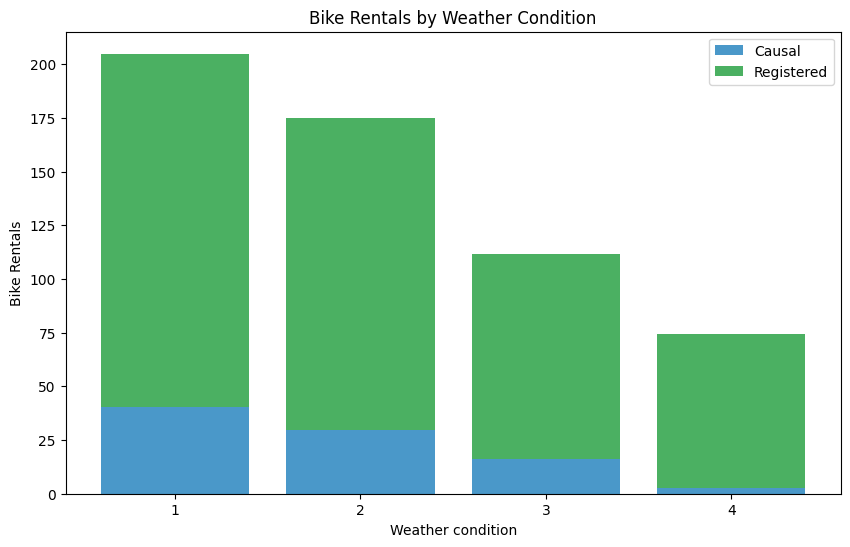

In [17]:
# rental bikes based on weather visualization
hours_registered = list(df_hour.groupby("weathersit")["registered"].mean())
hours_casual = list(df_hour.groupby("weathersit")["casual"].mean())
hours = list(df_hour.groupby("weathersit")["cnt"].mean())

plt.figure(figsize=(10, 6))
intensity = (np.ones(len(hours))*0.6)
bar_colors_registered = cm.Greens(intensity)  # Create a gradient based on the values
bar_colors_casual = cm.Blues(intensity)
plt.bar(range(1,len(hours_casual)+1), hours_casual, label='Causal', color=bar_colors_casual)
plt.bar(range(1,len(hours_registered)+1), hours_registered, label='Registered', bottom=hours_casual, color=bar_colors_registered)
plt.xticks(range(1,len(hours_casual)+1))
plt.xlabel("Weather condition")
plt.ylabel("Bike Rentals")
plt.legend()
plt.title("Bike Rentals by Weather Condition")
plt.show()

**Insight:**

Pertanyaan 1:
- Puncak aktivitas pengguna sepeda berada pada jam 18:00
- Aktivitas pengguna sepeda fluktuatif, mempunyai dua puncak lokal
- Aktivitas pengguna didominasi dengan pengguana registered

Pertanyaan 2:
- Aktivitas pengguna sepeda dipengengaruhi oleh kondisi cuaca
- Aktivitas pengguna terbanyak ketika kondisi cuaca 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- Aktivitas pengguna terendah ketika kondisi cuaca 2: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


## Analisis Lanjutan (Opsional)

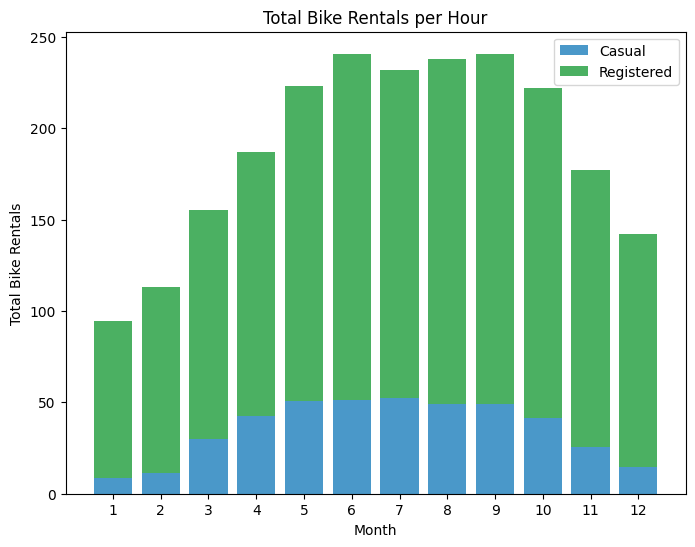

In [18]:
# rental bikes based on month of the year visualization
hours_registered = list(df_hour.groupby("mnth")["registered"].mean())
hours_casual = list(df_hour.groupby("mnth")["casual"].mean())
hours = list(df_hour.groupby("mnth")["cnt"].mean())

plt.figure(figsize=(8, 6))
intensity = (np.ones(len(hours))*0.6)
bar_colors_registered = cm.Greens(intensity)
bar_colors_casual = cm.Blues(intensity)
plt.bar(range(1,len(hours_casual)+1), hours_casual, label='Casual', color=bar_colors_casual)
plt.bar(range(1,len(hours_registered)+1), hours_registered, label='Registered', bottom=hours_casual, color=bar_colors_registered)
plt.xticks(range(1,len(hours_casual)+1))
plt.xlabel("Month")
plt.ylabel("Total Bike Rentals")
plt.legend()
plt.title("Total Bike Rentals per Hour")
plt.show()

<ipython-input-19-902440379893>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='workingday', y='cnt', data=df_day, palette="Set2", width=0.4)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 

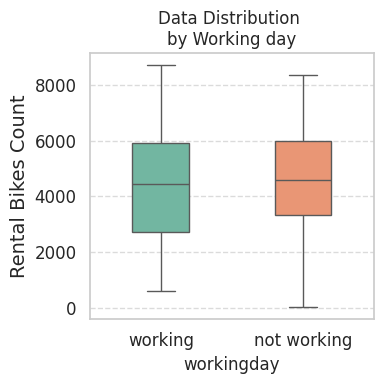

In [19]:
# rental bikes box plot based on working day visualization

sns.set(style="whitegrid")

plt.figure(figsize=(4,4))
box_plot = sns.boxplot(x='workingday', y='cnt', data=df_day, palette="Set2", width=0.4)

plt.title('Data Distribution \nby Working day', fontsize=12)
plt.ylabel('Rental Bikes Count', fontsize=14)
xticks_labels = ['working', 'not working']
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-20-f77de8a2b942>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='season', y='cnt', data=df_day, palette="Set2", width=0.4)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

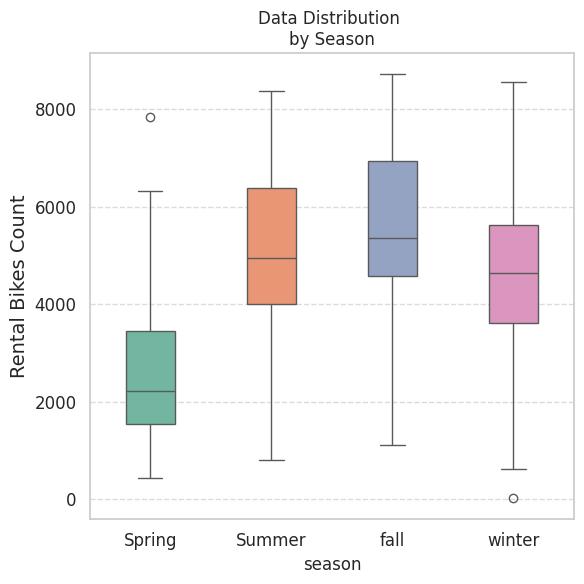

In [20]:
# rental bikes based on season of the year visualization

sns.set(style="whitegrid")

plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='season', y='cnt', data=df_day, palette="Set2", width=0.4)

plt.title('Data Distribution \nby Season', fontsize=12)
plt.ylabel('Rental Bikes Count', fontsize=14)
xticks_labels = ['Spring', 'Summer', 'fall', 'winter']
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels,fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# adding smoothing (moving average) on the cnt data
df_day['cnt_avg_14'] = df_day['cnt'].rolling(window=7, center=True).mean()

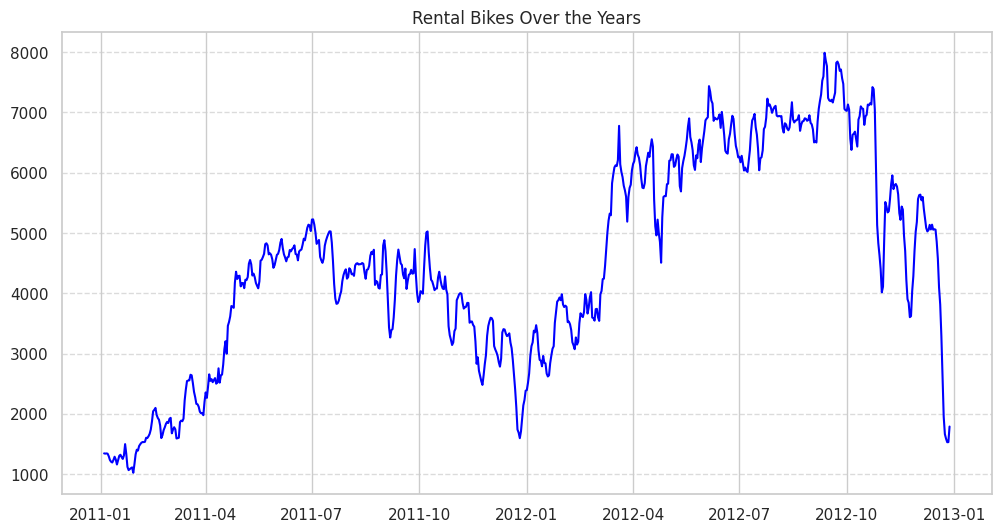

In [22]:
# rental bikes per day from 2011 to 2012
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['cnt_avg_14'], linestyle='-', color='blue')

plt.title('Rental Bikes Over the Years', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [23]:
# categorize the temperature based on quartil
df_day['temp_category'] = pd.qcut(df_day['temp'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

<ipython-input-24-82a27fbb4c41>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='temp_category', y='cnt', data=df_day, palette="Set2", width=0.4)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

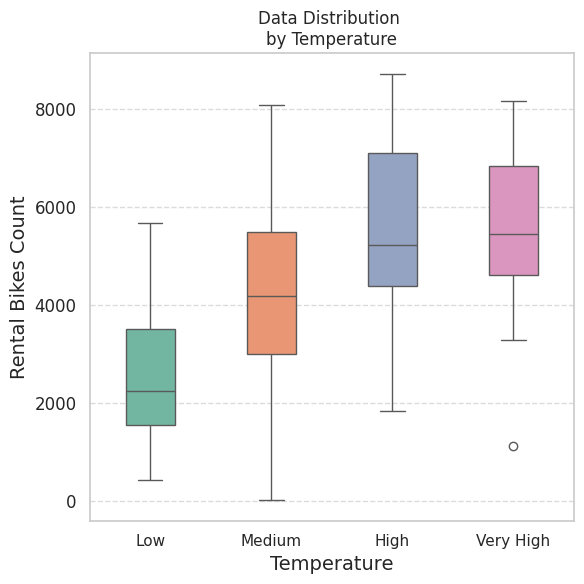

In [24]:
# rental bikes based on temp categories

sns.set(style="whitegrid")

plt.figure(figsize=(6,6))
box_plot = sns.boxplot(x='temp_category', y='cnt', data=df_day, palette="Set2", width=0.4)

plt.title('Data Distribution \nby Temperature', fontsize=12)
plt.ylabel('Rental Bikes Count', fontsize=14)
plt.xlabel('Temperature', fontsize=14)

plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

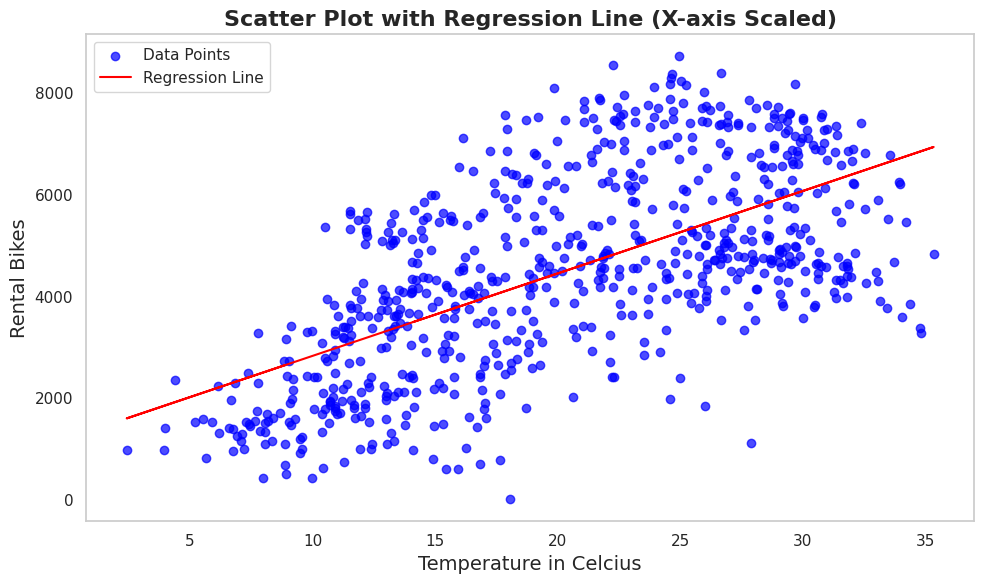

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


df_day['temp_scaled'] = df_day['temp'] * 41

# Fit the model using the original temperature data (not scaled)
X = sm.add_constant(df_day['temp'])
Y = df_day['cnt']
model = sm.OLS(Y, X).fit()

# Predict the count using the model
df_day['predicted_cnt'] = model.predict(X)

# Create scatter plot with scaled temperature on the x-axis
plt.figure(figsize=(10, 6))
plt.scatter(df_day['temp_scaled'], df_day['cnt'], color='blue', label='Data Points', alpha=0.7)

# Plot regression line with scaled temperature on the x-axis
plt.plot(df_day['temp_scaled'], df_day['predicted_cnt'], color='red', label='Regression Line')

# Customize the plot
plt.title('Scatter Plot with Regression Line (X-axis Scaled)', fontsize=16, fontweight='bold')
plt.xlabel('Temperature in Celcius', fontsize=14)
plt.ylabel('Rental Bikes', fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


**Insight:**

- Peak of the rental bikes is around middle of the year, in summer & fall
- When working day the rental bikes usage was slightly lower that non working day
- Rental bikes usage went up from the year 2011 to 2012
- Rental bikes and Temperature have positive relationship.


## Conclusion

- Pola Aktivitas Pengguna Sepeda: Aktivitas pengguna sepeda mencapai puncaknya pada pukul 18:00. Selain itu, aktivitas pengguna juga mengalami fluktuasi dengan dua puncak lokal. Dari segi jenis pengguna, mayoritas aktivitas didominasi oleh pengguna registered.
- Aktivitas pengguna sepeda sangat dipengaruhi oleh kondisi cuaca. Rental bikes paling banyak tercatat digunakan pada kondisi cuaca cerah atau berawan ringan (Clear, Few clouds, Partly cloudy). Sebaliknya, aktivitas pengguna sepeda mencapai titik terendah saat cuaca ekstrem, seperti hujan lebat disertai badai atau salju tebal, yang tentunya menurunkan minat penggunaan sepeda secara signifikan.